# Supervised Learning
The idea of this notebook is using different learning machines in order to see how good are timbral features to describe musical genres. 
The data used is extracted from the GTZAN dataset: mfcc using gaussian windows with 60% overlapping. The features are the mean of the mfcc and the flattened covariance matrix for a total of 250 features

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy import interp
from sklearn import preprocessing,manifold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, auc

In [2]:
data = pd.read_csv("mfccToy.csv",header=None)
data = pd.DataFrame(data).to_numpy()
data.shape

(300, 211)

Data preprocessing: Cleaning NaN and Normalizing without imposing a distribution

In [3]:
data = data[~np.isnan(data).any(axis=1)]
data.shape

target = data[:,-1]
X = data[:,:-1]
X_norm = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [4]:
def plotgenres(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="c",label="classical")
    ax1.scatter(Xe[target==2,0],Xe[target==2,1],c="black",label="metal")
    ax1.scatter(Xe[target==3,0],Xe[target==3,1],c="lightgreen",label="reggae")
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="c",label="classical")
    ax2.scatter(Xe[pred==2,0],Xe[pred==2,1],c="black",label="metal")
    ax2.scatter(Xe[pred==3,0],Xe[pred==3,1],c="lightgreen",label="reggae")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.suptitle(title)
    plt.show()

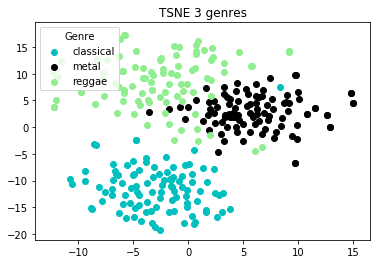

In [11]:
Xe= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_norm)
fig,ax=plt.subplots()
ax.scatter(Xe[target==1,0],Xe[target==1,1],c="c",label="classical")
ax.scatter(Xe[target==2,0],Xe[target==2,1],c="black",label="metal")
ax.scatter(Xe[target==3,0],Xe[target==3,1],c="lightgreen",label="reggae")
plt.legend(loc='upper left',title="Genre")
plt.title('TSNE 3 genres')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
Xe_test= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test)

## Classifiers

### Logistic Regression

In [8]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

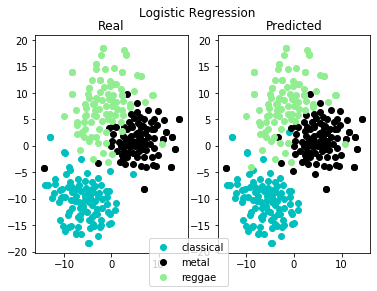

In [9]:
pred = logistic.predict(X_norm)
plotgenres(Xe,target,pred,"Logistic Regression")

In [10]:
pred = logistic.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333


Test error:  0.9333333333333333


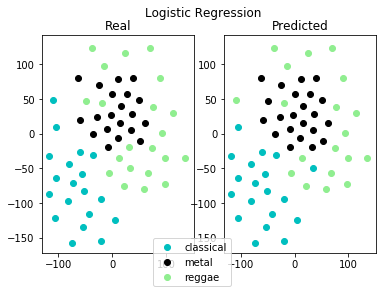

In [47]:
plotgenres(Xe_test,y_test,pred,"Logistic Regression (test)")

## Decision Tree

In [13]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

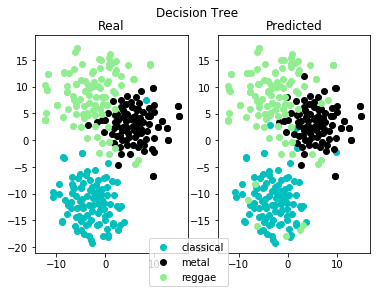

In [14]:
pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"Decision Tree")

In [15]:
pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.8833333333333333
Recall: 0.8833333333333333
F1 Score: 0.8833333333333333


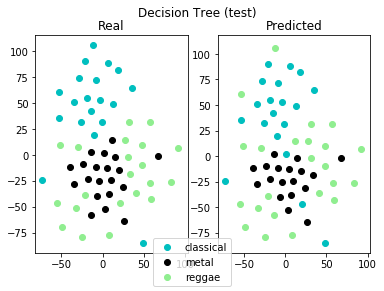

In [16]:
plotgenres(Xe_test,y_test,pred,"Decision Tree (test)")

## Support vector machine

Kernels:
* Lineal
* Polynomial
* Radial base

In [17]:
clf2 = svm.SVC(kernel = 'rbf')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

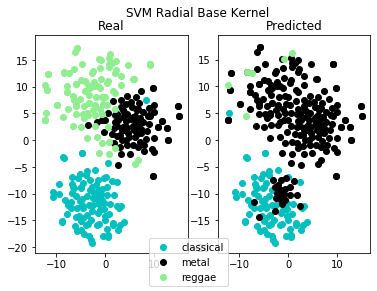

In [18]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Radial Base Kernel")

In [41]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print(scores)
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

(0.5166666666666667, 0.5166666666666667, 0.5166666666666667, None)
Precision: 0.5166666666666667
Recall: 0.5166666666666667
F1 Score: 0.5166666666666667


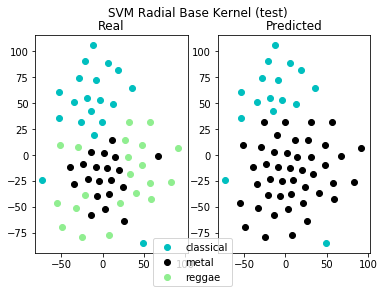

In [20]:
plotgenres(Xe_test,y_test,pred,"SVM Radial Base Kernel (test)")

In [21]:
clf2 = svm.SVC(kernel = 'linear')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

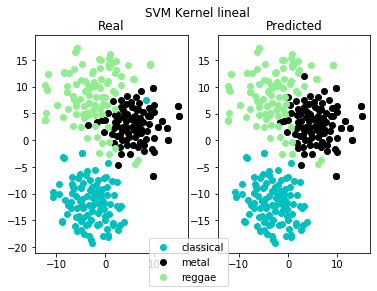

In [22]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Kernel lineal")

In [23]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.95
Recall: 0.95
F1 Score: 0.9500000000000001


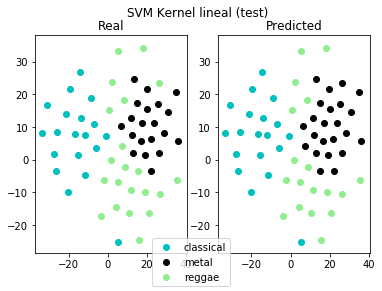

In [25]:
plotgenres(Xe_test,y_test,pred,"SVM Kernel lineal (test)")

In [39]:
clf2 = svm.SVC(kernel = 'poly',degree=3)
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

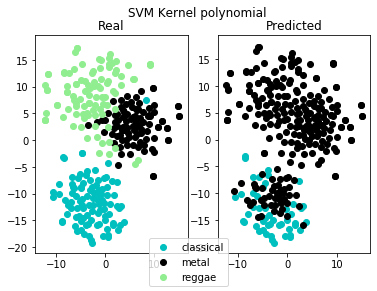

In [40]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Kernel polynomial")

In [37]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.5166666666666667
Recall: 0.5166666666666667
F1 Score: 0.5166666666666667


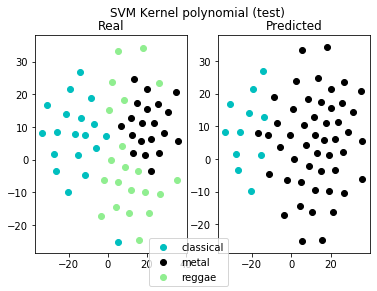

In [29]:
plotgenres(Xe_test,y_test,pred,"SVM Kernel polynomial (test)")

## Multilayer Perceptron

* Hidden layers: $L = 1,...,3$
* Number of neurons in the hidden layers: $l_i = 1,2,3$
* Learning rate: 0.2,0.5,0.9

In [30]:
learning_rate = [0.2,0.5,0.9]
nn =  MLPClassifier(hidden_layer_sizes=(1,1,1), learning_rate_init=.2)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 1, 1), learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
learning_rate, activation = 0.2, 'relu'
error = 0
# Choose best performance with combinations of activations and learning rate
for act in ['relu','tanh','logistic']:
    for lr in [0.002,0.005,0.009,0.008]:
        nn =  MLPClassifier(hidden_layer_sizes=(3,3,3),activation=act, learning_rate_init=lr)
        nn.fit(X_train,y_train)
        err = np.sum(nn.predict(X_val) == y_val)/len(y_val)
        print(act,lr,err)
        if(err > error):
            learning_rate, activation, error = lr,act,err
nn =  MLPClassifier(hidden_layer_sizes=(3,3,3),activation=activation, learning_rate_init=learning_rate)
nn.fit(X_train,y_train)

relu 0.002 0.6041666666666666
relu 0.005 0.7083333333333334
relu 0.009 0.8958333333333334
relu 0.008 0.8541666666666666
tanh 0.002 0.875
tanh 0.005 0.9375
tanh 0.009 0.9166666666666666
tanh 0.008 0.3125
logistic 0.002 0.3125
logistic 0.005 0.3333333333333333
logistic 0.009 0.3125
logistic 0.008 0.3541666666666667


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
              learning_rate_init=0.005, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

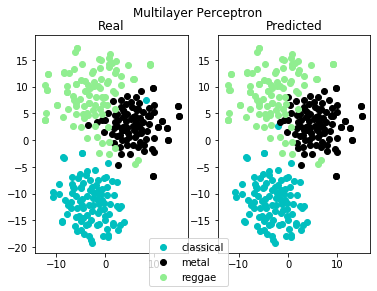

0.05078593156855002


In [32]:
pred = nn.predict(X_norm)
plotgenres(Xe,target,pred,"Multilayer Perceptron")
print(nn.loss_)

In [33]:
pred = nn.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333


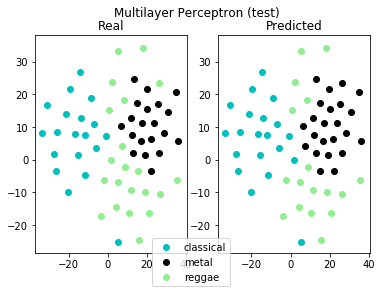

In [34]:
plotgenres(Xe_test,y_test,pred,"Multilayer Perceptron (test)")

| Parámetro | Logistic  Regression | Decision Tree | SVM Linear | SVM rbf | SVM Poly | Multilayer Perceptron |
|:---------:|:--------------------:|:-------------:|:----------:|:-------:|:--------:|:---------------------:|
| Precision |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|   Recall  |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|     F1    |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |